{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

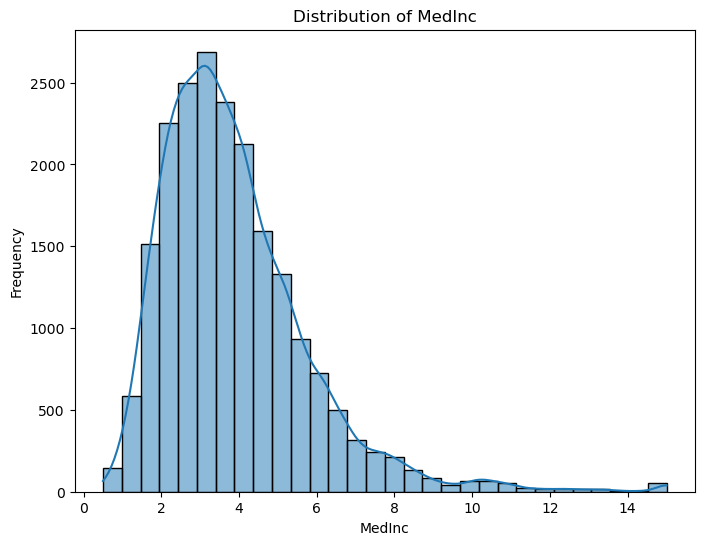

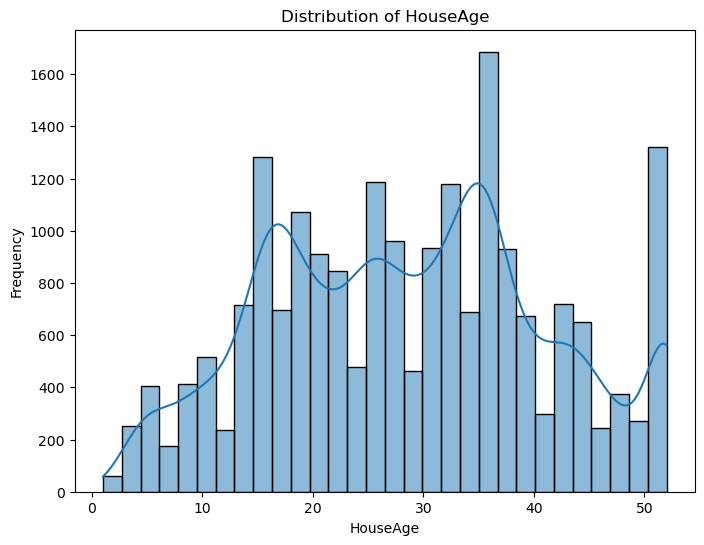

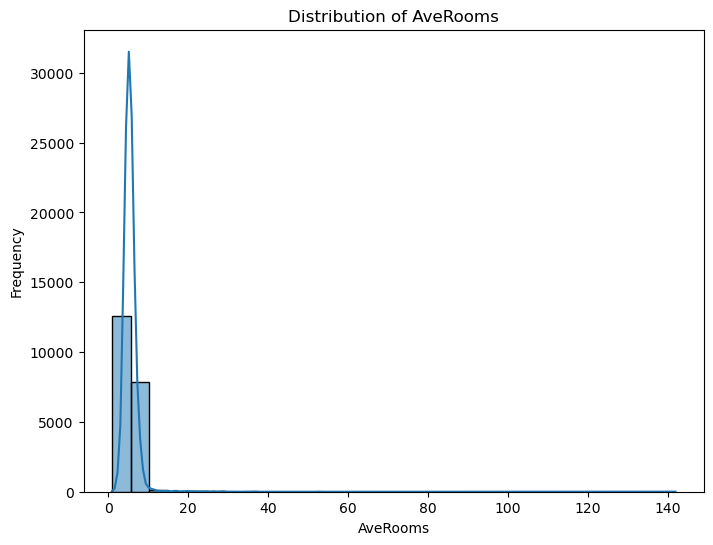

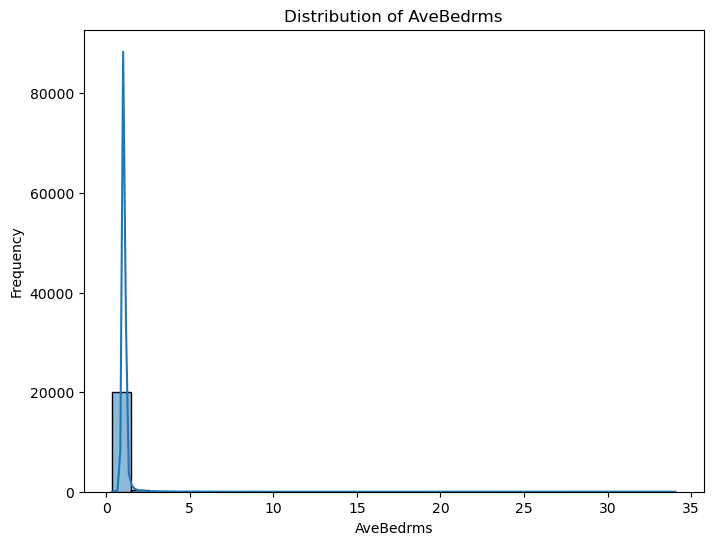

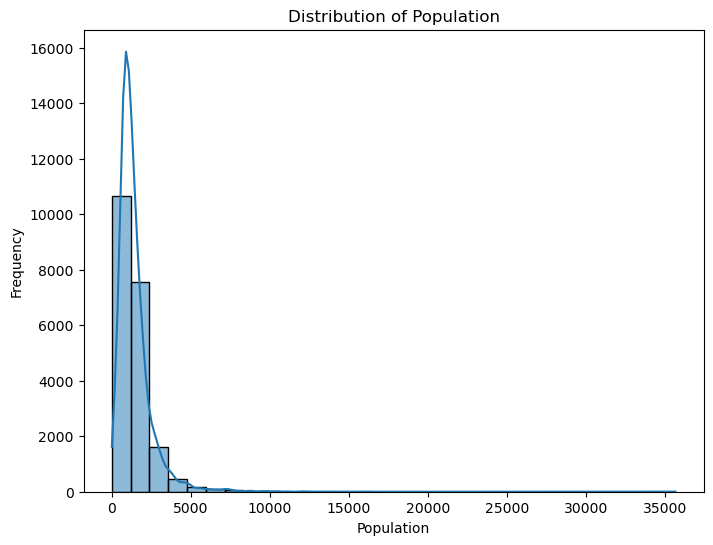

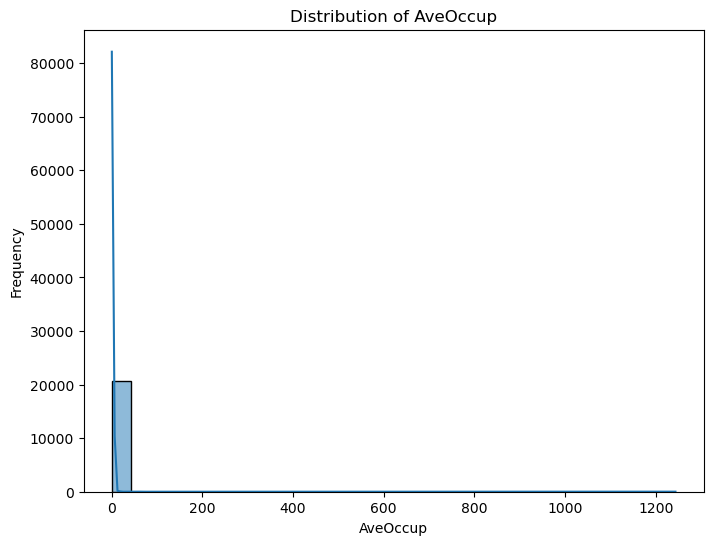

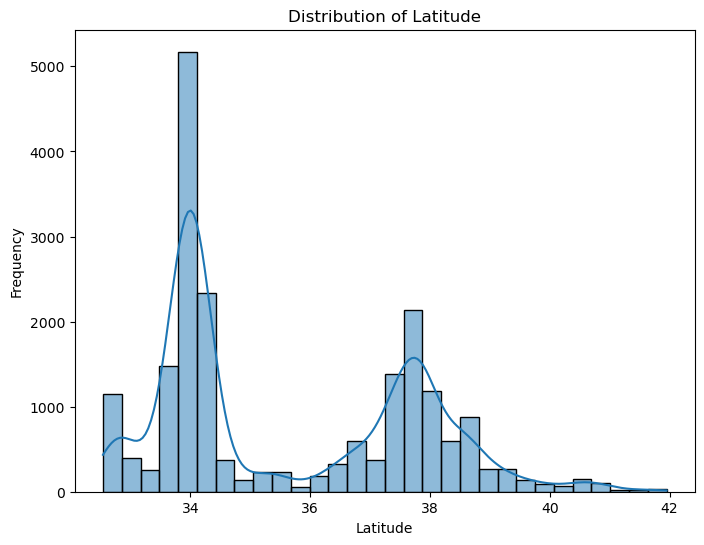

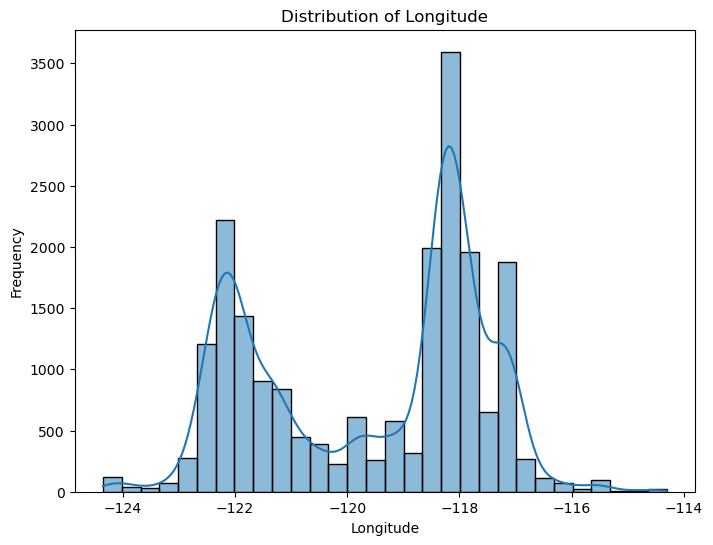

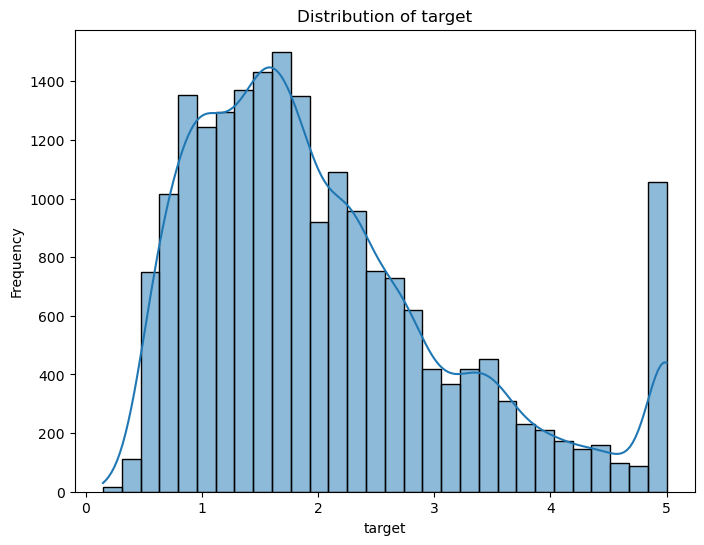

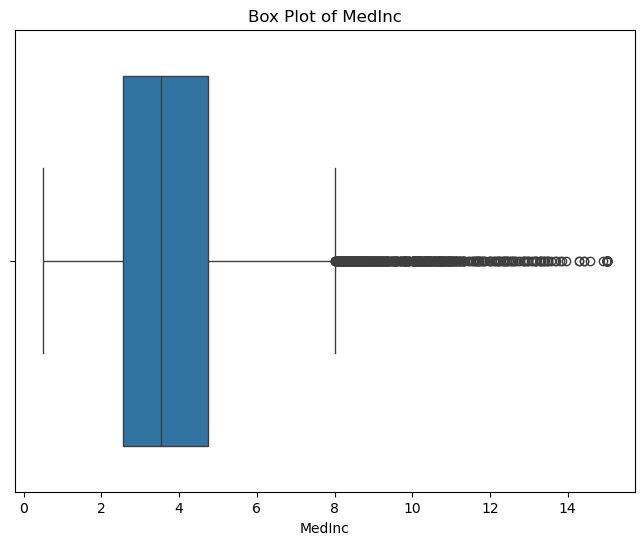

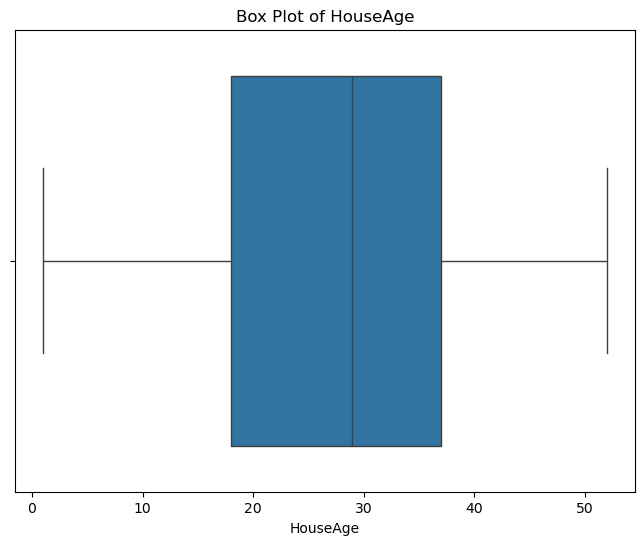

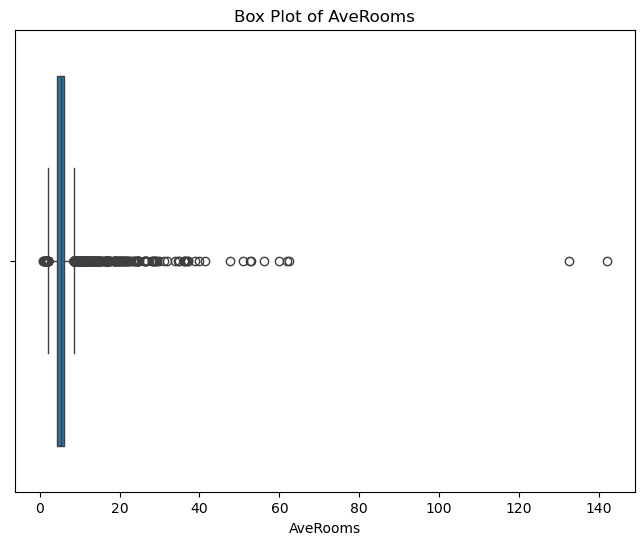

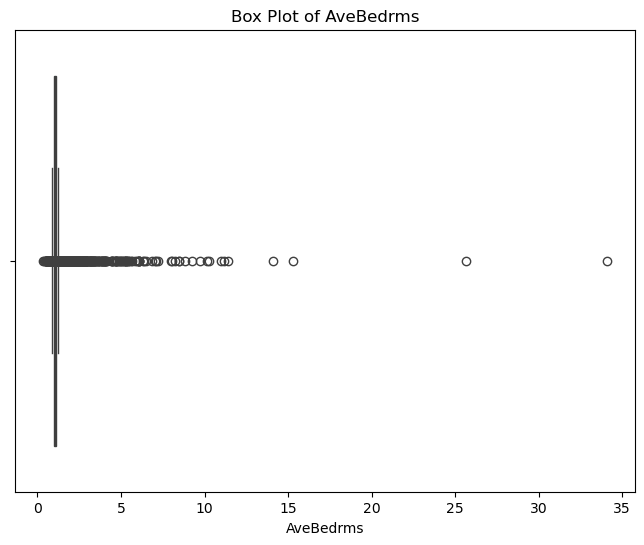

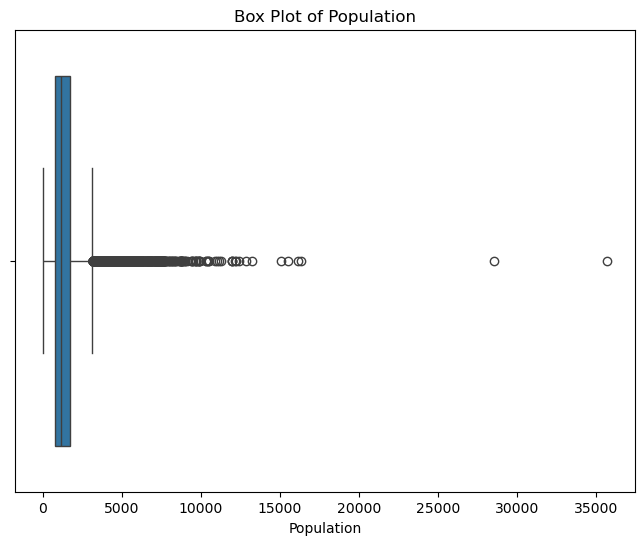

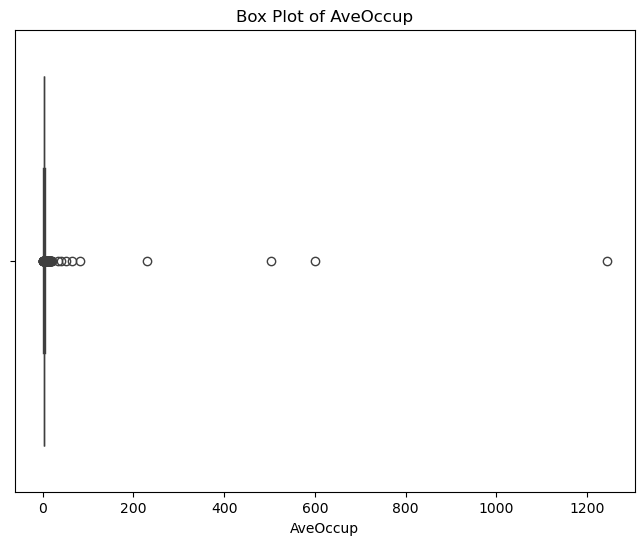

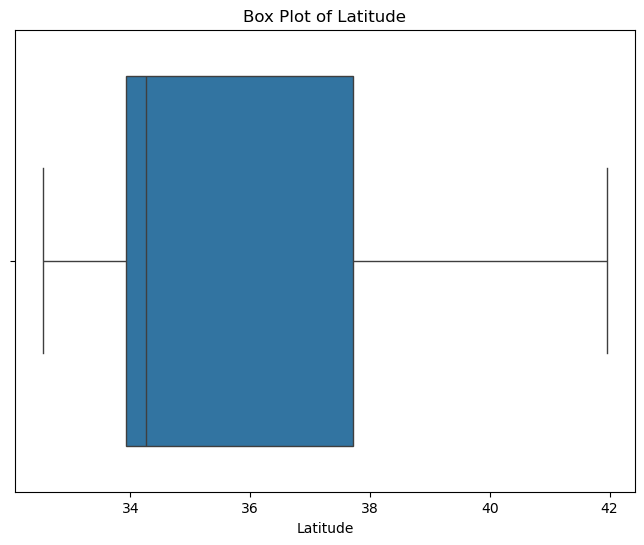

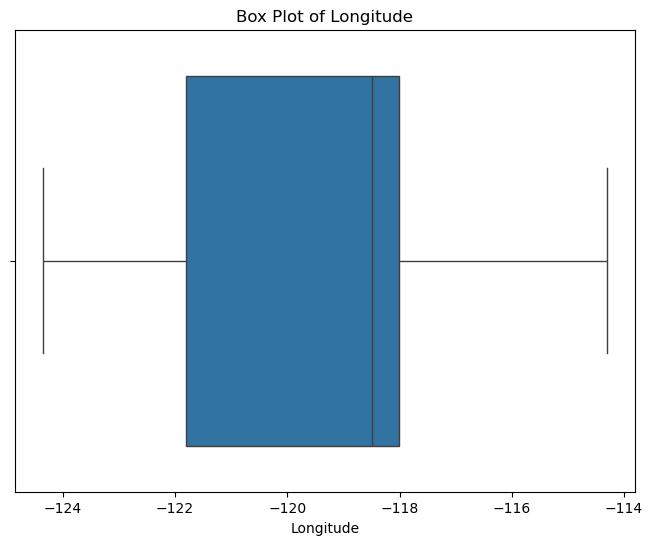

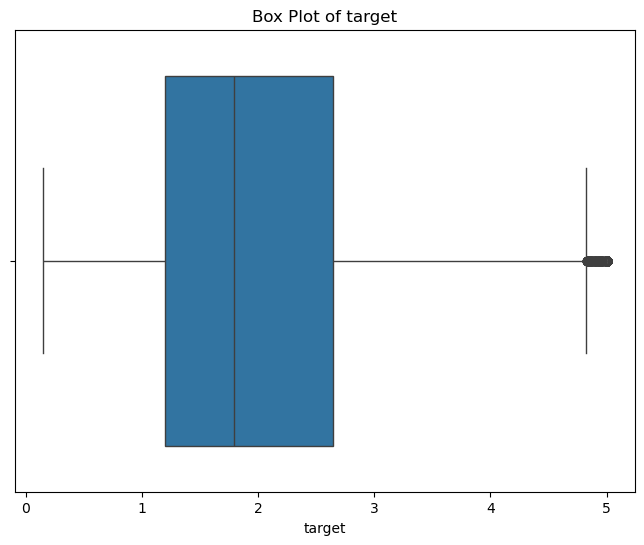

Summary Statistics of the Numerical Features:
              count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   
target      20640.0     2.068558     1.153956    0.149990    1.196000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms  

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
data = fetch_california_housing()
print(data)
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)
df['target'] = data.target  # Adding target variable (house value) for context

# Step 2: Plot histograms for all numerical features
def plot_histograms(df):
    num_features = df.select_dtypes(include=[np.number]).columns  # Get numerical columns
    for feature in num_features:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Step 3: Plot box plots for all numerical features
def plot_boxplots(df):
    num_features = df.select_dtypes(include=[np.number]).columns  # Get numerical columns
    for feature in num_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[feature])
        plt.title(f'Box Plot of {feature}')
        plt.xlabel(feature)
        plt.show()

# Step 4: Analyze distribution and outliers
def analyze_features(df):
    num_features = df.select_dtypes(include=[np.number]).columns  # Get numerical columns
    summary_stats = df[num_features].describe().transpose()  # Summary statistics
    print("Summary Statistics of the Numerical Features:")
    print(summary_stats)
    
    # Identify potential outliers by considering values beyond 1.5*IQR for each feature
    for feature in num_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        print(f"\nOutliers for {feature}: {len(outliers)}")
        if len(outliers) > 0:
            print(outliers[feature].head())

# Running the functions
plot_histograms(df)
plot_boxplots(df)
analyze_features(df)